In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df_movies=pd.read_csv('F://simplilearn/live/data science with python/movielens/movies.dat',sep='::',names = ['MovieID', 'Title', 'Genres'])

<ipython-input-2-2a6028cf5985>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_movies=pd.read_csv('F://simplilearn/live/data science with python/movielens/movies.dat',sep='::',names = ['MovieID', 'Title', 'Genres'])


In [3]:
display(df_movies.head())
full_data=pd.read_csv('F://simplilearn/live/data science with python/movielens/movies.dat',sep='::',names = ['MovieID', 'Title', 'Genres'])

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


<ipython-input-3-a7df3a54465a>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  full_data=pd.read_csv('F://simplilearn/live/data science with python/movielens/movies.dat',sep='::',names = ['MovieID', 'Title', 'Genres'])


In [4]:
df_ratings=pd.read_csv('F://simplilearn/live/data science with python/movielens/ratings.dat',sep='::',names = ['UserID','MovieID', 'Rating', 'Timestamp'], engine='python')

In [5]:
print(df_ratings.shape)
df_ratings.head()

(1000209, 4)


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
df_users = pd.read_csv('F://simplilearn/live/data science with python/movielens/users.dat', sep = "::", names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-Code'], engine='python')

In [7]:
print(df_users.shape)
display(df_users.head())
df_users.isnull().sum()

(6040, 5)


,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


UserID        0
Gender        0
Age           0
Occupation    0
Zip-Code      0
dtype: int64

In [8]:
movie_ratings = pd.merge(df_movies, df_ratings, on = "MovieID")
display (movie_ratings.head())
display (movie_ratings.shape)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


(1000209, 6)

In [9]:
full_data = pd.merge(movie_ratings, df_users, on = "UserID")
full_dataset=full_data.iloc[:10000,:]
data=full_dataset.copy()
display (data.head())
display (full_data.shape)
data.shape


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


(1000209, 10)

(10000, 10)

# --------- data-combined data with 10000 rows ---------

In [10]:
full_data.shape

(1000209, 10)

# Checking correlation between variables

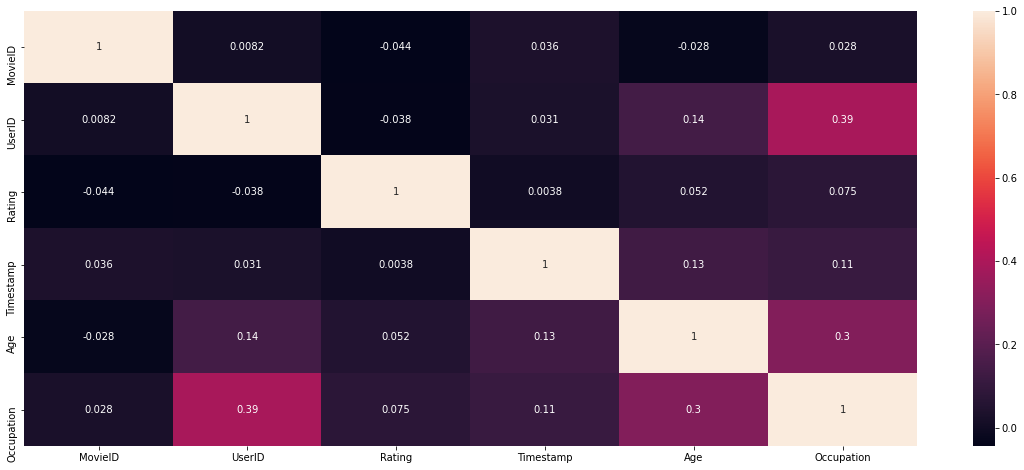

In [11]:
data5K = full_data

data5K.head()
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(20,8))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})


## Age:-assigning values to Age

In [12]:
full_data['Age'].value_counts()


25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [13]:
full_data['Age'].unique()

array([ 1, 50, 25, 35, 18, 45, 56], dtype=int64)

In [14]:
di = {1: 1, 18: 2,25:3,35:4,45:5,50:6,56:7}
full_data.replace({"Age": di},inplace=True)

type(full_data['Age'][0])

numpy.int64

In [15]:
full_data['Age'].unique()

array([1, 6, 3, 4, 2, 5, 7], dtype=int64)

# EDA

## 1. Age distribution

(array([ 27211.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 183536.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 395556.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0., 199003.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  83633.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,  72490.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
         38780.]),
 array([1.  , 1.12, 1.24, 1.36, 1.48, 1.6 , 1.72, 1.84, 1.96, 2.08, 2.2 ,
        2.32, 2.44, 2.56, 2.68, 2.8 , 2.92, 3.04, 3.16, 3.28, 3.4 , 3.52,
        3.64, 3.76, 3.88, 4.  , 4.12, 4.24, 4.36, 4.48, 4.6 , 4.72, 4.84,
        4.96, 5.08, 5.2 , 5.32, 5.44, 5.56, 5.68, 5.8 , 5.92, 6.04, 6.16,
        6.28, 6.4 , 6.52, 6.64, 6.76, 6.88, 7.  ]),
 <a list of 50 Patch objects>)

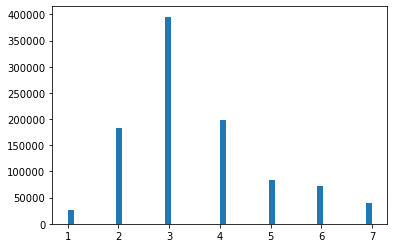

In [16]:
plt.hist(full_data['Age'],bin=50)

## 2. User rating of movie toystory

In [17]:
data[data['Title']=='Toy Story (1995)']["Rating"].mean()

4.1020408163265305

## 3. Top 25 movies by viewership rating

In [18]:
x=full_data[['Title','Rating']]
y=x.groupby('Title').mean()
y.nlargest(25,'Rating')

,Rating
Title,
"Baby, The (1973)",5.000000
Bittersweet Motel (2000),5.000000
Follow the Bitch (1998),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000
Lured (1947),5.000000
One Little Indian (1973),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
Smashing Time (1967),5.000000
Song of Freedom (1936),5.000000


## 4.Ratings of all movies by user_id=2926

In [19]:
full_data[full_data['UserID']==2696][['UserID','MovieID','Title','Rating']]

,UserID,MovieID,Title,Rating
991035,2696,350,"Client, The (1994)",3
991036,2696,800,Lone Star (1996),5
991037,2696,1092,Basic Instinct (1992),4
991038,2696,1097,E.T. the Extra-Terrestrial (1982),3
991039,2696,1258,"Shining, The (1980)",4
991040,2696,1270,Back to the Future (1985),2
991041,2696,1589,Cop Land (1997),3
991042,2696,1617,L.A. Confidential (1997),4
991043,2696,1625,"Game, The (1997)",4
991044,2696,1644,I Know What You Did Last Summer (1997),2


# Feature Engineering

## 1.One hot encoding Genres

In [20]:
data.Genres
data.shape

(10000, 10)

In [21]:
data.Genres=data.Genres.str.split("|")
data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),[Drama],1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Fantasy, Sci-Fi]",1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),"[Drama, War]",1,5,978824195,F,1,10,48067


In [22]:
print(data.shape)
uni=data.Genres.sum()
unique_genres = list(set(uni))

print(unique_genres)
len(unique_genres)

(10000, 10)
['Animation', 'Adventure', 'Fantasy', 'Romance', 'Sci-Fi', 'Crime', 'Thriller', 'Film-Noir', 'Comedy', 'War', 'Documentary', 'Drama', 'Mystery', 'Horror', 'Action', 'Western', 'Musical', "Children's"]


18

In [23]:

cols=['Fantasy', "Children's", 'Comedy', 'Horror', 'Mystery', 'Musical', 'Drama', 'Western', 'War', 'Documentary', 'Crime', 'Animation', 'Romance', 'Sci-Fi', 'Adventure', 'Film-Noir', 'Action', 'Thriller']
Genre_dummmy=pd.DataFrame(columns=cols,index=range(10000))

Genre_dummmy.iloc[:10000,:]=0
Genre_list=cols
print(Genre_list)
print(type(Genre_list))
print(type(Genre_dummmy))
Genre_dummmy.head()

['Fantasy', "Children's", 'Comedy', 'Horror', 'Mystery', 'Musical', 'Drama', 'Western', 'War', 'Documentary', 'Crime', 'Animation', 'Romance', 'Sci-Fi', 'Adventure', 'Film-Noir', 'Action', 'Thriller']
<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,Fantasy,Children's,Comedy,Horror,Mystery,Musical,Drama,Western,War,Documentary,Crime,Animation,Romance,Sci-Fi,Adventure,Film-Noir,Action,Thriller
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df_Genre=data[['Genres','MovieID']]
df_Genre.shape

(10000, 2)

In [25]:
data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),[Drama],1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Fantasy, Sci-Fi]",1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),"[Drama, War]",1,5,978824195,F,1,10,48067


In [26]:
x=0
for i in range(10000):
    #print(df_Genre.iloc[i,0])
    for j in df_Genre.iloc[i,0]:
        
        #print(j)
        if j in cols:
            Genre_dummmy.loc[i,j]=1
display(Genre_dummmy.head())
Genre_dummmy.shape

,Fantasy,Children's,Comedy,Horror,Mystery,Musical,Drama,Western,War,Documentary,Crime,Animation,Romance,Sci-Fi,Adventure,Film-Noir,Action,Thriller
0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


(10000, 18)

In [27]:
Genre_dummmy['MovieID']=data['MovieID']
Genre_dummmy.shape

(10000, 19)

In [28]:
x=data.drop(['MovieID','Genres','Title','UserID','Rating'],axis=1)
x.shape

(10000, 5)

In [29]:
x.head()

,Timestamp,Gender,Age,Occupation,Zip-Code
0,978824268,F,1,10,48067
1,978824351,F,1,10,48067
2,978301777,F,1,10,48067
3,978300760,F,1,10,48067
4,978824195,F,1,10,48067


In [30]:
x[cols]=Genre_dummmy.drop('MovieID',axis=1)

In [31]:
x.head()

,Timestamp,Gender,Age,Occupation,Zip-Code,Fantasy,Children's,Comedy,Horror,Mystery,...,War,Documentary,Crime,Animation,Romance,Sci-Fi,Adventure,Film-Noir,Action,Thriller
0,978824268,F,1,10,48067,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,978824351,F,1,10,48067,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,978301777,F,1,10,48067,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,978300760,F,1,10,48067,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,978824195,F,1,10,48067,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [32]:
x.shape

(10000, 23)

## 2.Dummies for Gender 

In [33]:
x['Gender']=x['Gender'].map({'M':0,'F':1})
x['Gender'].nunique()

2

In [34]:
x['Gender'].unique()

array([1, 0], dtype=int64)

In [35]:
x.shape

(10000, 23)

In [36]:
y=data[['Rating']]

In [37]:
y.shape

(10000, 1)

In [38]:
x.head()

,Timestamp,Gender,Age,Occupation,Zip-Code,Fantasy,Children's,Comedy,Horror,Mystery,...,War,Documentary,Crime,Animation,Romance,Sci-Fi,Adventure,Film-Noir,Action,Thriller
0,978824268,1,1,10,48067,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,978824351,1,1,10,48067,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,978301777,1,1,10,48067,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,978300760,1,1,10,48067,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,978824195,1,1,10,48067,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.linear_model import LinearRegression

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(7500, 23)
(2500, 23)
(7500, 1)
(2500, 1)


In [42]:
Lin_reg=LinearRegression()
Lin_reg.fit(x_train,y_train)


LinearRegression()

In [43]:
y_pred=Lin_reg.predict(x_test)

In [48]:
r2=r2_score(y_test,y_pred)
r2

0.02219434055560887

In [45]:
type(y_test.iloc[0,0])

numpy.int64

In [50]:
y_pred[:5]

array([[3.53323616],
       [3.60666971],
       [3.54575897],
       [3.80051787],
       [3.67775021]])

In [51]:
y_test.head()

,Rating
2656,5
445,5
9505,3
332,4
4168,4


In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
mean_squared_error(y_test,y_pred)

1.1782246862982946